# DiSENN: Self-Explaining Neural Networks with Disentanglement
---
**Experiment** : Pre Training Beta = 4

## Import libraries

In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import torch.nn as nn
from torchvision.utils import make_grid
import numpy as np
from pathlib import Path
from types import SimpleNamespace
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from models.losses import *
from models.parameterizer import ConvParameterizer
from models.conceptizer import ConvConceptizer, VaeConceptizer
from models.aggregator import SumAggregator

## Configuration

In [4]:
plt.style.use('seaborn-paper')

In [5]:
config = {
  "model_class": "DiSENN",
  "conceptizer": "VaeConceptizer",
  "pretrain_epochs": 1,
  "pre_beta": 4.0,
  "beta": 4.0,
  "concept_loss": "BVAE_loss",
  "robustness_loss": "mnist_robustness_loss",
  "train": True,
  "image_size": 28,
  "concept_dim": 1,
  "concept_visualization": None,
  "parameterizer": "ConvParameterizer",
  "cl_sizes": [1, 10, 20],
  "hidden_sizes": [320, 50],
  "num_concepts": 5,
  "num_classes": 10,
  "dropout": 0.5,
  "aggregator": "SumAggregator",
  "device": "cuda:0",
  "lr": 1e-3,
  "epochs": 5,
  "robust_reg": 1e-3,
  "concept_reg": 1,
  "print_freq": 50,
  "exp_name": "MNIST_DiSENN_pre_beta_4",
  "dataloader": "mnist",
  "data_path": "datasets/data/mnist_data",
  "batch_size" : 128,
  "eval_freq" : 100
}
config = SimpleNamespace(**config)

config = {
  "model_class": "DiSENN",
  "conceptizer": "VaeConceptizer",
  "pretrain_epochs": 3,
  "beta": 4.0,
  "concept_loss": "BVAE_loss",
  "robustness_loss": "mnist_robustness_loss",
  "train": True,
  "image_size": 28,
  "concept_dim": 1,
  "concept_visualization": None,
  "parameterizer": "ConvParameterizer",
  "cl_sizes": [1, 10, 20],
  "hidden_sizes": [320, 50],
  "num_concepts": 5,
  "num_classes": 10,
  "dropout": 0.5,
  "aggregator": "SumAggregator",
  "device": "cuda:0",
  "lr": 1e-3,
  "epochs": 5,
  "robust_reg": 1e-3,
  "concept_reg": 1,
  "print_freq": 50,
  "exp_name": "mnist_bvae_default",
  "dataloader": "mnist",
  "data_path": "datasets/data/mnist_data",
  "batch_size" : 128,
  "eval_freq" : 100
}
config = SimpleNamespace(**config)

config = {
  "model_class": "DiSENN",
  "conceptizer": "VaeConceptizer",
  "pretrain_epochs": 3,
  "beta": 4.0,
  "concept_loss": "BVAE_loss",
  "robustness_loss": "mnist_robustness_loss",
  "train": True,
  "image_size": 28,
  "concept_dim": 1,
  "concept_visualization": None,
  "parameterizer": "ConvParameterizer",
  "hidden_sizes": [320, 100],
  "num_concepts": 10,
  "num_classes": 10,
  "dropout": 0.5,
  "aggregator": "SumAggregator",
  "device": "cuda:0",
  "lr": 1e-3,
  "epochs": 5,
  "robust_reg": 1e-3,
  "concept_reg": 1,
  "print_freq": 50,
  "exp_name": "mnist_bvae_concepts10",
  "dataloader": "mnist",
  "data_path": "datasets/data/mnist_data",
  "batch_size" : 128,
  "eval_freq" : 100
}
config = SimpleNamespace(**config)

config = {
  "model_class": "DiSENN",
  "conceptizer": "VaeConceptizer",
  "pretrain_epochs": 3,
  "beta": 4.0,
  "concept_loss": "BVAE_loss",
  "robustness_loss": "mnist_robustness_loss",
  "train": True,
  "image_size": 28,
  "concept_dim": 1,
  "concept_visualization": None,
  "parameterizer": "ConvParameterizer",
  "hidden_sizes": [320, 200],
  "num_concepts": 20,
  "num_classes": 10,
  "dropout": 0.5,
  "aggregator": "SumAggregator",
  "device": "cpu",
  "lr": 1e-3,
  "epochs": 5,
  "robust_reg": 1e-3,
  "concept_reg": 1,
  "print_freq": 50,
  "exp_name": "mnist_bvae_concepts20",
  "dataloader": "mnist",
  "data_path": "datasets/data/mnist_data",
  "batch_size" : 128,
  "eval_freq" : 100
}
config = SimpleNamespace(**config)

# DiSENN
DiSENN (Self-Explaining Neural Networks with Disentanglement) is an extension of the Self-Explaining Neural Network proposed by [1]  

DiSENN incorporates a constrained variational inference framework on a 
SENN Concept Encoder to learn disentangled representations of the 
basis concepts as in [2]. The basis concepts are then independently
sensitive to single generative factors leading to better interpretability 
and lesser overlap with other basis concepts. Such a strong constraint 
better fulfills the "diversity" desiderata for basis concepts
in a Self-Explaining Neural Network.


References  
[1] Alvarez Melis, et al.
"Towards Robust Interpretability with Self-Explaining Neural Networks" NIPS 2018  
[2] Irina Higgins, et al. 
”β-VAE: Learning basic visual concepts with a constrained variational framework.” ICLR 2017. 

In [6]:
from models.senn import DiSENN

## Load Data

In [7]:
from datasets.dataloaders import get_dataloader
train_dl, val_dl, _ = get_dataloader(config)

## Training

In [8]:
from trainer import DiSENNTrainer

In [9]:
trainer = DiSENNTrainer(config)
trainer.run()
trainer.finalize()

Using device cuda:0
Loading data ...
SENN(
  (conceptizer): VaeConceptizer(
    (encoder): VaeEncoder(
      (FC): Sequential(
        (0): Flatten()
        (1): Linear(in_features=784, out_features=512, bias=True)
        (2): ReLU()
        (3): Linear(in_features=512, out_features=256, bias=True)
        (4): ReLU()
        (5): Linear(in_features=256, out_features=100, bias=True)
        (6): ReLU()
      )
      (mean_layer): Linear(in_features=100, out_features=5, bias=True)
      (logvar_layer): Linear(in_features=100, out_features=5, bias=True)
    )
    (decoder): VaeDecoder(
      (FC): Sequential(
        (0): Linear(in_features=5, out_features=100, bias=True)
        (1): ReLU()
        (2): Linear(in_features=100, out_features=256, bias=True)
        (3): ReLU()
        (4): Linear(in_features=256, out_features=512, bias=True)
        (5): ReLU()
        (6): Linear(in_features=512, out_features=784, bias=True)
      )
    )
  )
  (parameterizer): ConvParameterizer(
    (

## Load Trained Model

In [10]:
conceptizer = eval(config.conceptizer)(**config.__dict__)
parameterizer = eval(config.parameterizer)(**config.__dict__)
aggregator = eval(config.aggregator)(**config.__dict__)

In [11]:
model = DiSENN(conceptizer, parameterizer, aggregator)

In [12]:
checkpoint_path = Path('results')
model_file = checkpoint_path / config.exp_name / "checkpoints" / "best_model.pt" 
checkpoint = torch.load(model_file, config.device)
print(f"Loading trained model: {model_file}")

Loading trained model: results/MNIST_DiSENN_pre_beta_4/checkpoints/best_model.pt


In [13]:
model.load_state_dict(checkpoint['model_state'])

<All keys matched successfully>

# Classification

In [14]:
xb, yb = next(iter(val_dl))
y_pred, explanations, x_reconstruct = model(xb)

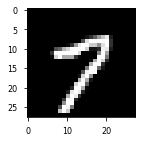

In [15]:
plt.rcParams['figure.figsize'] = (2, 2)
plt.imshow(xb[-1][0], cmap='gray')

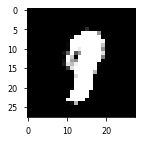

In [16]:
plt.imshow(x_reconstruct[-1][0].detach().numpy(), cmap='gray')

In [17]:
model = model.to(config.device)

In [18]:
accuracy = 0.
model.eval()
with torch.no_grad():
    for i, (x, labels) in enumerate(val_dl):
        x = x.float().to(config.device)
        labels = labels.long().to(config.device)
        y_pred, explanations, x_reconstructed = model(x)
        accuracy += (y_pred.argmax(axis=1) == labels).float().mean().item()
print(f"Test Mean Accuracy: {accuracy//i * 100} %")

Test Mean Accuracy: 100.0 %


In [19]:
model = model.to(torch.device('cpu'))

# Explanation

## Generate Prototypes from Disentangled Concepts

In [20]:
(yb==8).nonzero()

tensor([[  0],
        [  3],
        [ 31],
        [ 42],
        [ 64],
        [ 66],
        [ 78],
        [ 79],
        [ 92],
        [ 98],
        [110],
        [112],
        [113],
        [116]])

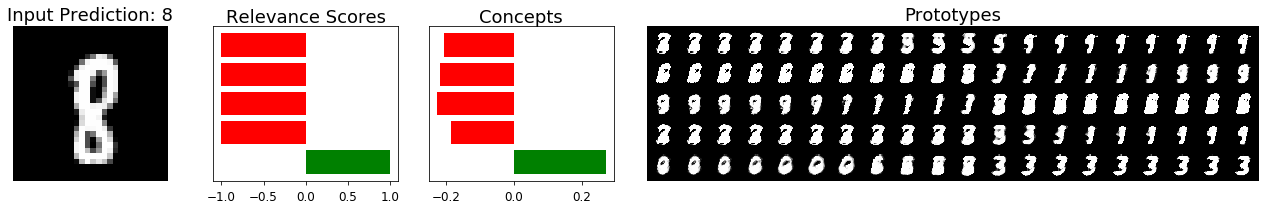

In [22]:
x = xb[0].cpu()
fname = "/digit8a.png"
model.explain(x, traversal_range=0.45,
              gridsize=(1,6), col_span=3, figure_size=(18,3), show=True,
              save_as="results/"+config.exp_name+fname, use_cdf=True)

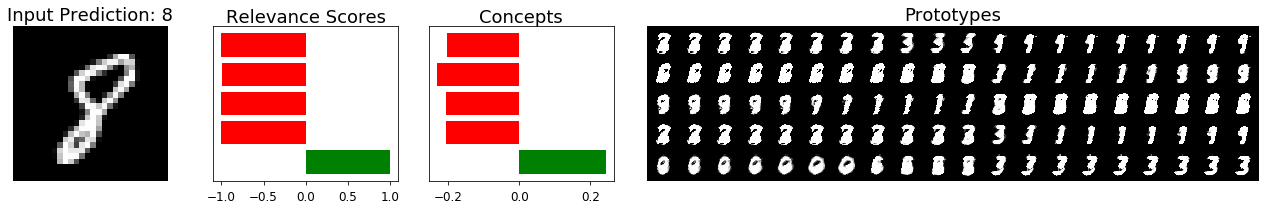

In [23]:
x = xb[3].cpu()
fname = "/digit8b.png"
model.explain(x, traversal_range=0.45,
              gridsize=(1,6), col_span=3, figure_size=(18,3), show=True,
              save_as="results/"+config.exp_name+fname, use_cdf=True)

In [26]:
(yb==2).nonzero()

tensor([[  6],
        [ 29],
        [ 59],
        [ 70],
        [ 74],
        [ 75],
        [ 86],
        [ 99],
        [107],
        [123],
        [124]])

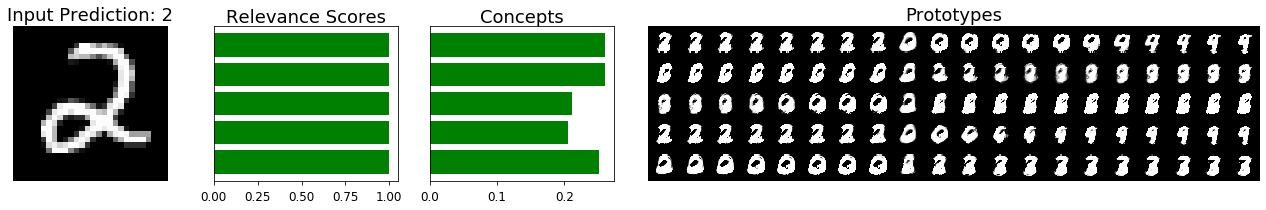

In [27]:
x = xb[6].cpu()
fname = "/digit2a.png"
model.explain(x, traversal_range=0.45,
              gridsize=(1,6), col_span=3, figure_size=(18,3), show=True,
              save_as="results/"+config.exp_name+fname, use_cdf=True)

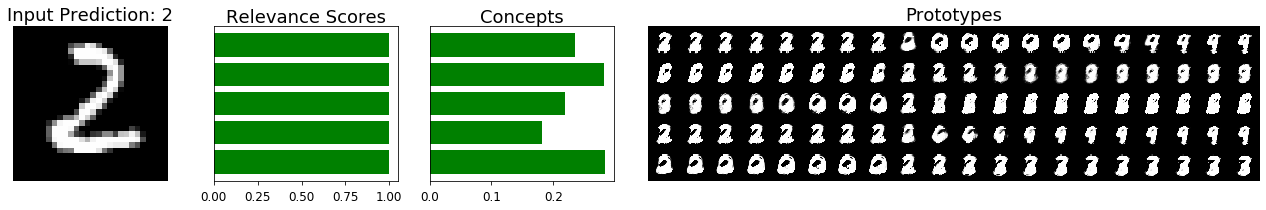

In [28]:
x = xb[29].cpu()
fname = "/digit2b.png"
model.explain(x, traversal_range=0.45,
              gridsize=(1,6), col_span=3, figure_size=(18,3), show=True,
              save_as="results/"+config.exp_name+fname, use_cdf=True)